In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#from tensorflow.compat.v1 import ConfigProto
#from tensorflow.compat.v1 import InteractiveSession

#config = ConfigProto()
#config.gpu_options.allow_growth = True
#session = InteractiveSession(config=config)

# Connect Drive to save and restore results

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir /content/drive/My\ Drive/Results_WGAN_GP_aug
MAIN_SAVE_DIR = '/content/drive/My Drive/Results_WGAN_GP_aug'

Mounted at /content/drive
mkdir: cannot create directory ‘/content/drive/My Drive/Results_WGAN_GP_aug’: File exists


# Environment prep for Colab


*  download git repo

*   install required pip packages



In [ ]:
!git clone https://github.com/kkahloots/PokemonGAN.git
IMG_DIR = '/content/PokemonGAN/data/.pokemon'
%cd /content/PokemonGAN/
#!pip -q install -r /content/Generative_Models/requirements.txt # we do not working here!!
!pip install colorlog==4.0.2
!pip install Augmentor

Cloning into 'PokemonGAN'...
remote: Enumerating objects: 2214, done.
remote: Total 2214 (delta 0), reused 0 (delta 0), pack-reused 2214
Receiving objects: 100% (2214/2214), 1.35 GiB | 31.05 MiB/s, done.
Resolving deltas: 100% (57/57), done.
Checking out files: 100% (2097/2097), done.
/content/PokemonGAN


In [ ]:
!pip install livelossplot

# Settings

In [ ]:
%env TF_KERAS = 1
import os
sep_local = os.path.sep

import sys
sys.path.append('..'+sep_local+'..')
print(sep_local)

env: TF_KERAS=1
/


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
os.getcwd()

'/content/PokemonGAN'

In [ ]:
os.chdir('..'+sep_local)
print(os.getcwd())
%cd /content/PokemonGAN/

/content
/content/PokemonGAN


In [ ]:
!ls /content/PokemonGAN/building/

mertics.py  models.py  ops.py  __pycache__  WGAN_GP.py


# only on colab

In [ ]:
#don't need here, data set already correct lmdb

In [ ]:
#!cat data/.pokemon/pokemon.tar.part* > data/.pokemon/pokemon.tar

In [ ]:
#!tar -xvf data/.pokemon/pokemon_combined.tar --directory data/.pokemon/

# Augmentation

In [ ]:
import Augmentor
path = os.path.join(IMG_DIR, 'DS06')
if path is not None:
  p1 = Augmentor.Pipeline(path)
  p1.shear(probability=1, max_shear_left=20, max_shear_right=20)
  p1.process()
  p2 = Augmentor.Pipeline(path)
  p2.rotate(probability=1, max_left_rotation=20, max_right_rotation=20)
  p2.process()
  p3 = Augmentor.Pipeline(path)
  p3.flip_top_bottom(probability=1)
  p3.process()
  p4 = Augmentor.Pipeline(path)
  p4.crop_random(probability=1, percentage_area=0.6)
  p4.resize(probability=1, width=400, height=400)
  p4.process()
  p5 = Augmentor.Pipeline(path)
  p5.random_color(probability=1, min_factor=0.5, max_factor=0.5)
  p5.process()
  p6 = Augmentor.Pipeline(path)
  p6.flip_left_right(probability=1)
  p6.process()

Executing Pipeline:   0%|          | 0/809 [00:00<?, ? Samples/s]

Initialised with 809 image(s) found.
Output directory set to /content/PokemonGAN/data/.pokemon/DS06/output.

Processing <PIL.Image.Image image mode=RGBA size=400x400 at 0x7F898FAD60F0>: 100%|██████████| 809/809 [00:46<00:00, 17.34 Samples/s]
Executing Pipeline:   0%|          | 0/809 [00:00<?, ? Samples/s]

Initialised with 809 image(s) found.
Output directory set to /content/PokemonGAN/data/.pokemon/DS06/output.

Processing <PIL.Image.Image image mode=RGBA size=400x400 at 0x7F89981DC860>: 100%|██████████| 809/809 [00:50<00:00, 15.86 Samples/s]
Executing Pipeline:   0%|          | 0/809 [00:00<?, ? Samples/s]

Initialised with 809 image(s) found.
Output directory set to /content/PokemonGAN/data/.pokemon/DS06/output.

Processing <PIL.Image.Image image mode=RGBA size=400x400 at 0x7F898F9B52E8>: 100%|██████████| 809/809 [00:26<00:00, 30.23 Samples/s]
Processing <PIL.Image.Image image mode=RGBA size=400x400 at 0x7F898FB769E8>:   0%|          | 1/809 [00:00<02:39,  5.07 Samples/s]

Initialised with 809 image(s) found.
Output directory set to /content/PokemonGAN/data/.pokemon/DS06/output.

Processing <PIL.Image.Image image mode=RGBA size=400x400 at 0x7F898F93CAC8>: 100%|██████████| 809/809 [00:32<00:00, 25.12 Samples/s]
Executing Pipeline:   0%|          | 0/809 [00:00<?, ? Samples/s]

Initialised with 809 image(s) found.
Output directory set to /content/PokemonGAN/data/.pokemon/DS06/output.

Processing <PIL.Image.Image image mode=RGBA size=400x400 at 0x7F898F8A83C8>: 100%|██████████| 809/809 [00:26<00:00, 30.48 Samples/s]
Executing Pipeline:   0%|          | 0/809 [00:00<?, ? Samples/s]

Initialised with 809 image(s) found.
Output directory set to /content/PokemonGAN/data/.pokemon/DS06/output.

Processing <PIL.Image.Image image mode=RGBA size=400x400 at 0x7F898F88D400>: 100%|██████████| 809/809 [00:26<00:00, 30.28 Samples/s]


In [ ]:
!ls data/.pokemon/DS06/output/

DS06_original_001.png_15ef71b0-9dbf-4996-9e16-000690090ea7.png
DS06_original_001.png_50cf899a-aba3-43e8-82b3-94dfc3e9794d.png
DS06_original_001.png_7aed541e-8425-42fb-bff7-02ff7430351e.png
DS06_original_001.png_a17a88e7-b880-490c-80af-8cb14b0d1ad3.png
DS06_original_001.png_d56d2212-cbac-46f0-809f-3947f7e258f0.png
DS06_original_001.png_f28209df-754a-409b-a728-031f505bc551.png
DS06_original_002.png_1e8fd31c-f42a-45b2-a8f5-9ccd4a84a6de.png
DS06_original_002.png_23527703-0c51-44fc-b921-852d82027b10.png
DS06_original_002.png_3a6906eb-6217-487a-96c2-7adbade1d037.png
DS06_original_002.png_5b167e89-ae0d-49e7-accb-f888a894226f.png
DS06_original_002.png_919a5953-6663-4113-83cd-7ae8b60c13bc.png
DS06_original_002.png_b38dad01-953e-45a9-8874-294b91e2ead5.png
DS06_original_003.png_09de9f6b-b811-4839-8af5-92840abc7d6d.png
DS06_original_003.png_4729c65e-98c1-4625-8801-4c20aeb02955.png
DS06_original_003.png_484abea1-fe68-4e0d-91f9-bf155c330070.png
DS06_original_003.png_97b6df36-0e97-4d8b-9afe-b4d5d5397

In [ ]:
!mv /content/PokemonGAN/data/.pokemon/DS06/output/*.png /content/PokemonGAN/data/.pokemon/DS06/
!rm -rf /content/PokemonGAN/data/.pokemon/DS06/output

In [ ]:
!ls /content/PokemonGAN/data/.pokemon/DS06/

001.png
002.png
003.png
004.png
005.png
006.png
007.png
008.png
009.png
010.png
011.png
012.png
013.png
014.png
015.png
016.png
017.png
018.png
019.png
020.png
021.png
022.png
023.png
024.png
025.png
026.png
027.png
028.png
029.png
030.png
031.png
032.png
033.png
034.png
035.png
036.png
037.png
038.png
039.png
040.png
041.png
042.png
043.png
044.png
045.png
046.png
047.png
048.png
049.png
050.png
051.png
052.png
053.png
054.png
055.png
056.png
057.png
058.png
059.png
060.png
061.png
062.png
063.png
064.png
065.png
066.png
067.png
068.png
069.png
070.png
071.png
072.png
073.png
074.png
075.png
076.png
077.png
078.png
079.png
080.png
081.png
082.png
083.png
084.png
085.png
086.png
087.png
088.png
089.png
090.png
091.png
092.png
093.png
094.png
095.png
096.png
097.png
098.png
099.png
100.png
101.png
102.png
103.png
104.png
105.png
106.png
107.png
108.png
109.png
110.png
111.png
112.png
113.png
114.png
115.png
116.png
117.png
118.png
119.png
120.png
121.png
122.png
123.png
124.png
125.png


In [ ]:
from PIL import Image
import glob

In [ ]:
img_path = '\content\PokemonGAN\data\.pokemon\DS06'
image_list = []
resized_image_list = []

In [ ]:
for filename in glob.glob('/content/PokemonGAN/data/.pokemon/DS06/*.png'):
  img = Image.open(filename)
  image_list.append(img)
  print(img.size)

Streaming output truncated to the last 5000 lines.
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(40

In [ ]:
for image in image_list:
  image = image.resize((128, 128))
  resized_image_list.append(image)
  print(image.size)

Streaming output truncated to the last 5000 lines.
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(12

In [ ]:
!mkdir /content/PokemonGAN/data/.pokemon/01
for (i, new) in enumerate(resized_image_list):
  new.save('{}{}{}'.format('/content/PokemonGAN/data/.pokemon/01/', i+1, '.png'))

In [ ]:
%cd /
!ls /content/PokemonGAN/data/.pokemon/01/

/
1000.png  1639.png  2276.png  2913.png	3550.png  4188.png  4825.png  5462.png
1001.png  163.png   2277.png  2914.png	3551.png  4189.png  4826.png  5463.png
1002.png  1640.png  2278.png  2915.png	3552.png  418.png   4827.png  5464.png
1003.png  1641.png  2279.png  2916.png	3553.png  4190.png  4828.png  5465.png
1004.png  1642.png  227.png   2917.png	3554.png  4191.png  4829.png  5466.png
1005.png  1643.png  2280.png  2918.png	3555.png  4192.png  482.png   5467.png
1006.png  1644.png  2281.png  2919.png	3556.png  4193.png  4830.png  5468.png
1007.png  1645.png  2282.png  291.png	3557.png  4194.png  4831.png  5469.png
1008.png  1646.png  2283.png  2920.png	3558.png  4195.png  4832.png  546.png
1009.png  1647.png  2284.png  2921.png	3559.png  4196.png  4833.png  5470.png
100.png   1648.png  2285.png  2922.png	355.png   4197.png  4834.png  5471.png
1010.png  1649.png  2286.png  2923.png	3560.png  4198.png  4835.png  5472.png
1011.png  164.png   2287.png  2924.png	3561.png  4199.png  4836.

# Data set to LMDB

In [ ]:
!rm -rf /content/PokemonGAN/data/.pokemon_LMDB*

In [ ]:
import os
import sys
import lmdb
import pickle
import numpy as np

In [ ]:
%cd /content/PokemonGAN/

/content/PokemonGAN


In [ ]:
from transformation.lmdb_transformer import LmdbTransformer

In [ ]:
images_dir = IMG_DIR #Folder to images
validation_percentage = 20
valid_format = 'png'

In [ ]:
images_dir

'/content/PokemonGAN/data/.pokemon'

In [ ]:
#%cd /content/Generative_Models
#!mv data/.pokemon/DS06 data/.pokemon/01
#%cd /content/Generative_Models/data/.pokemon/01
#!ls -v | cat -n | while read n f; do mv -n "$f" "$n.png"; done 
!ls /content/PokemonGAN/data/.pokemon/01
!rm -rf /content/PokemonGAN/data/.pokemon/DS06

1000.png  1639.png  2276.png  2913.png	3550.png  4188.png  4825.png  5462.png
1001.png  163.png   2277.png  2914.png	3551.png  4189.png  4826.png  5463.png
1002.png  1640.png  2278.png  2915.png	3552.png  418.png   4827.png  5464.png
1003.png  1641.png  2279.png  2916.png	3553.png  4190.png  4828.png  5465.png
1004.png  1642.png  227.png   2917.png	3554.png  4191.png  4829.png  5466.png
1005.png  1643.png  2280.png  2918.png	3555.png  4192.png  482.png   5467.png
1006.png  1644.png  2281.png  2919.png	3556.png  4193.png  4830.png  5468.png
1007.png  1645.png  2282.png  291.png	3557.png  4194.png  4831.png  5469.png
1008.png  1646.png  2283.png  2920.png	3558.png  4195.png  4832.png  546.png
1009.png  1647.png  2284.png  2921.png	3559.png  4196.png  4833.png  5470.png
100.png   1648.png  2285.png  2922.png	355.png   4197.png  4834.png  5471.png
1010.png  1649.png  2286.png  2923.png	3560.png  4198.png  4835.png  5472.png
1011.png  164.png   2287.png  2924.png	3561.png  4199.png  4836.pn

In [ ]:
#del transformer

In [ ]:
transformer = LmdbTransformer(image_dir=images_dir, validation_pct=validation_percentage, valid_image_formats=valid_format)

In [ ]:
import os
import numpy as np


def get_label_by_filename(img_path):
    name, _ = os.path.splitext(img_path)
    vid_img_arr = name.split(sep=os.sep)[-1:]
    return {'label': str(vid_img_arr[0])} #filename

In [ ]:
images_dir
#!rm -rf /content/LMDB_Datasets/.data/Pokemon_LMDB

'/content/PokemonGAN/data/.pokemon'

In [ ]:
transformer.transform_store(labels_fn=get_label_by_filename,image_dir=images_dir, lmdb_dir = '/content/PokemonGAN/data/.aug_pokemon_LMDB'
           ,category='training',target_size=(128, 128),color_mode='rgb')

Total number of imgs for catagory 4555
Storing 4555/content/PokemonGAN/data/.aug_pokemon_LMDB/ into _training from folder 01


In [ ]:
transformer.transform_store(labels_fn=get_label_by_filename,image_dir=images_dir, lmdb_dir =  '/content/PokemonGAN/data/.aug_pokemon_LMDB'
           ,category='validation',target_size=(128, 128),color_mode='rgb')

Total number of imgs for catagory 1108
Storing 1108/content/PokemonGAN/data/.aug_pokemon_LMDB/ into _validation from folder 01


In [ ]:
#!cp /content/LMDB_Datasets/ -r /content/drive/My\ Drive/temalab
#!cp /content/Generative_Models/ -r /content/drive/My\ Drive/temalab

In [ ]:
dict = {'Dataset_name': 'Pokemon', 'Dataset_size': 5663, 'val_num_images': 1108, 'tra_num_images': 4555};
transformer.save_metadata('/content/PokemonGAN/data/.aug_pokemon_LMDB', dict)

In [ ]:
%cd /content/
!ls PokemonGAN/data/.aug_pokemon_LMDB
#!cat Generative_Models/data/.aug_pokemon_LMDB/meta_info.json
transformer.get_metadata('/content/PokemonGAN/data/.aug_pokemon_LMDB')

/content
meta_info.json	_training  _validation


{'Dataset_name': 'Pokemon',
 'Dataset_size': 5663,
 'tra_num_images': 4555,
 'val_num_images': 1108}

# Dataset loading

In [ ]:
dataset_name='Pokemon'
inputs_shape= image_shape=(128, 128, 3)
batch_size = 36
latents_dim = 256
intermediate_dim = 50
lmdb_dir = 'data/.aug_pokemon_LMDB'

In [ ]:
from transformation.lmdb_transformer import LmdbTransformer

In [ ]:
%cd /content/PokemonGAN/

/content/PokemonGAN


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from transformation.lmdb_transformer import LmdbTransformer


from utils.data_and_files.data_utils import infer_type
from generators.from_lmdb.lmdb_image_iterator import LMDB_ImageIterator

class LMDB_ImageGenerator(ImageDataGenerator):
    def flow_from_lmdb_lists(self,
                             num_images,
                             category,
                             lmdb_dir,
                             batch_size,
                             episode_len=None,
                             episode_shift=None,
                             shuffle=True,
                             class_mode='categorical',
                             seed=None
                             ):
        return LMDB_ImageIterator(
            num_images=num_images,
            category=category,
            lmdb_dir=lmdb_dir,
            batch_size=batch_size,
            episode_len=episode_len,
            episode_shift=episode_shift,
            class_mode = class_mode,
            shuffle=shuffle,
            seed=seed)


def create_generators(
        val_lmdb_dir,
        val_num_images,
        tra_lmdb_dir,
        tra_num_images,
        batch_size,
        episode_len=None,
        episode_shift=None,
        class_mode='categorical'
):
    train_datagen = LMDB_ImageGenerator()

    valid_datagen = LMDB_ImageGenerator()

    train_generator = train_datagen.flow_from_lmdb_lists(
        num_images=tra_num_images,
        category='training',
        lmdb_dir=tra_lmdb_dir,
        batch_size=batch_size,
        episode_len=episode_len,
        episode_shift=episode_shift,
        class_mode=class_mode,
        seed=0)

    validation_generator = valid_datagen.flow_from_lmdb_lists(
        num_images=val_num_images,
        category='validation',
        lmdb_dir=val_lmdb_dir,
        batch_size=batch_size,
        episode_len=episode_len,
        episode_shift=episode_shift,
        class_mode=class_mode,
        seed=0)

    return train_generator, validation_generator


def get_generators(
        lmdb_dir,
        batch_size,
        episode_len=None,
        episode_shift=None,
        class_mode='categorical',
        return_itr=False
):
    transformer = LmdbTransformer(image_dir=lmdb_dir,
                                  validation_pct=20,
                                  valid_image_formats='png')
    meta = transformer.get_metadata(lmdb_dir)

    training_gen, val_gen = create_generators(val_lmdb_dir=os.path.join(lmdb_dir, '_validation'),
                                             val_num_images=meta['val_num_images'],
                                             tra_lmdb_dir=os.path.join(lmdb_dir, '_training'),
                                             tra_num_images=meta['tra_num_images'],
                                             batch_size=batch_size,
                                             episode_len=episode_len,
                                             episode_shift=episode_shift,
                                             class_mode = class_mode
                                             )


    data = training_gen.next()
    dtypes = {k: infer_type(v[0]) for k, v in data.items()}

    if return_itr:
        return training_gen, val_gen

    else:
        train_generator = tf.data.Dataset.from_generator(
            lambda: training_gen,
            output_types=dtypes,
        )

        val_generator = tf.data.Dataset.from_generator(
            lambda: val_gen,
            output_types=dtypes,
        )
    return  train_generator, val_generator

In [ ]:
train_generator, val_generator = get_generators(
        lmdb_dir=lmdb_dir,
        batch_size=batch_size,
        episode_len=None,
        episode_shift=None,
        return_itr=False
)

/content/PokemonGAN/transformation/file_image_generator.py:51: UserWarning: No files found
  warnings.warn(msg)


Initializing Iterator training Number of images 4555
Initializing Iterator validation Number of images 1108


In [ ]:
import numpy as np
_instance_scale=1.0
for data in val_generator:
    print(np.max(data['images']))
    break
    #print(data.keys())

1.0


In [ ]:
[*data['images'][0].shape]


[128, 128, 3]

In [ ]:
data.keys()

dict_keys(['images', 'label'])

In [ ]:
restore_path = MAIN_SAVE_DIR

# Model's Layers definition

In [ ]:
from building.models import WGAN_GP

/content/PokemonGAN/utils/utils.py:33: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
gan_model = WGAN_GP(
                    model_name=dataset_name+'_WGAN_GP_AUG', 
                    save_path=restore_path, 
                    image_size=inputs_shape, 
                    z_dim=latents_dim, 
                    n_critic=5, 
                    batch_size=batch_size,
                    g_penalty=10
                   )

restore generator successfully ... 
unable to restore ... 
Model: "Generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1, 1, 256)]       0         
_________________________________________________________________
up_conv2d_12 (UpConv2D)      (None, 4, 4, 1024)        4194304   
_________________________________________________________________
batch_norm_10 (BatchNorm)    (None, 4, 4, 1024)        4096      
_________________________________________________________________
re_lu_10 (ReLU)              (None, 4, 4, 1024)        0         
_________________________________________________________________
up_conv2d_13 (UpConv2D)      (None, 8, 8, 512)         8388608   
_________________________________________________________________
batch_norm_11 (BatchNorm)    (None, 8, 8, 512)         2048      
________________________________________________________________

# Model training

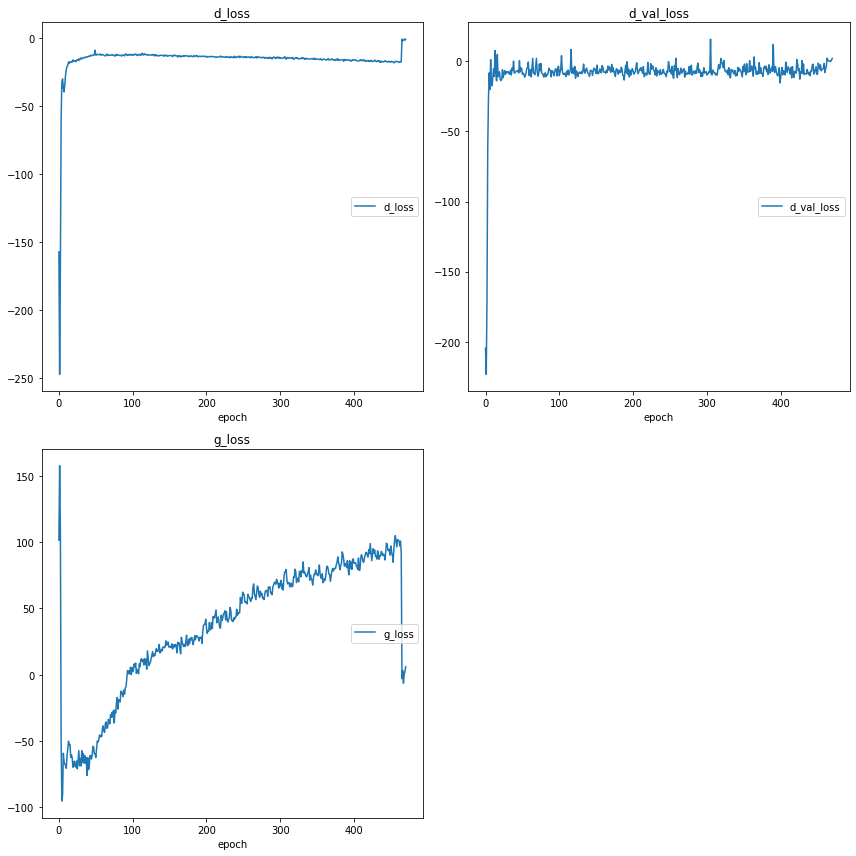

d_loss
	d_loss           	 (min: -247.043, max:   -0.570, cur:   -0.593)
d_val_loss
	d_val_loss       	 (min: -223.294, max:   15.743, cur:    1.998)
g_loss
	g_loss           	 (min:  -95.177, max:  157.519, cur:    6.057)
Epoch 472/50000


In [ ]:
gan_model.train(dataset=train_generator, val_dataset=val_generator, epochs=int(5e4), n_itr=300)

In [ ]:
!cp /content/PokemonGAN/images /content/drive/My Drive/temalab